In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn import svm
from sklearn.svm import SVC

### Reading both training and testing data in different data frame:- 

In [3]:
training_data = pd.read_csv('SalaryData_Train(1).csv')
training_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
testing_data = pd.read_csv('SalaryData_Test(1).csv')
testing_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## EDA :- 

In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


### 1) Age :- Age of the person 

<AxesSubplot:xlabel='age', ylabel='Density'>

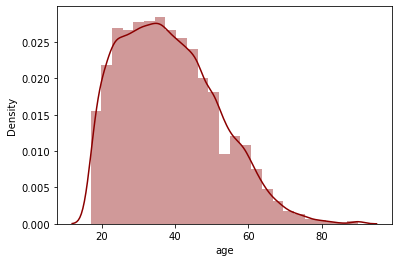

In [6]:
sns.distplot(training_data.age,bins=25,color='darkred')

### 2) Educationno - Education Number

<AxesSubplot:xlabel='educationno', ylabel='Density'>

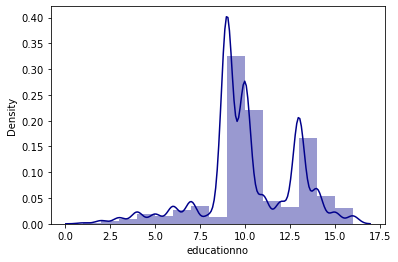

In [7]:
sns.distplot(training_data.educationno,color='darkblue',bins=15)

### 3) hoursperweek - Working of the person per week

<AxesSubplot:xlabel='hoursperweek', ylabel='Density'>

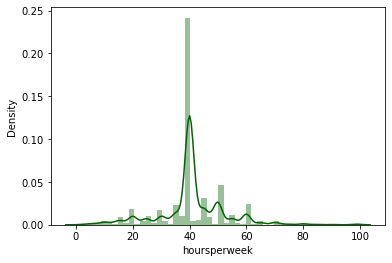

In [8]:
sns.distplot(training_data.hoursperweek,color='darkgreen')

### 4) workclass - Working Class of the person 

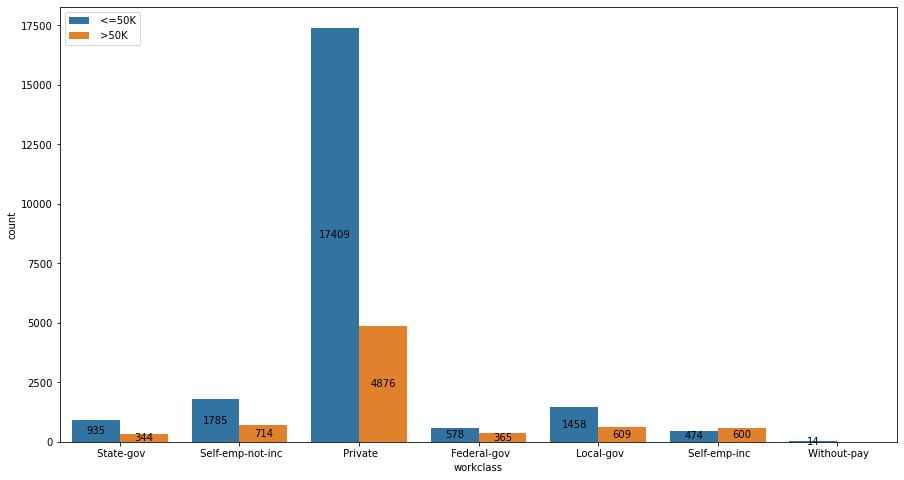

In [9]:
plt.figure(figsize=(15,8))
ct = sns.countplot(data=training_data,x='workclass',hue='Salary')
plt.legend(loc='best')
for c in ct.containers:
    
    ct.bar_label(c, label_type='center')

### 5) Education - Education type of the person 

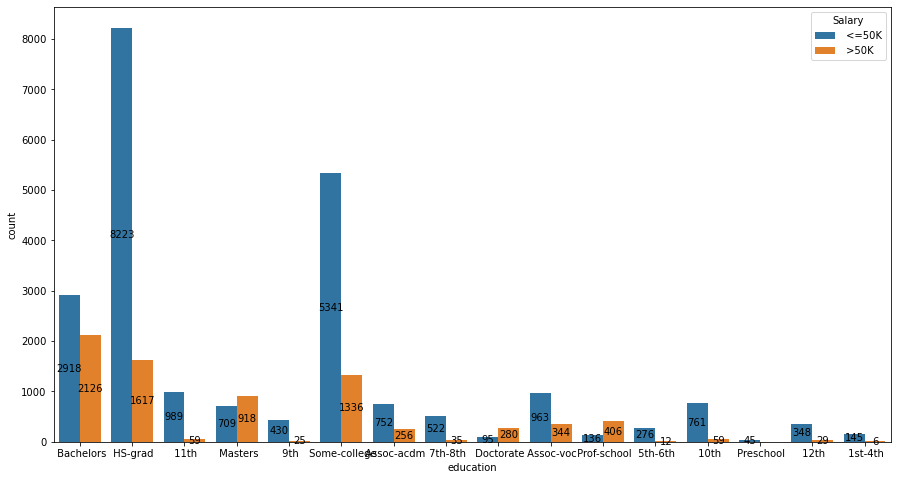

In [10]:
plt.figure(figsize=(15,8))
ct = sns.countplot(data=training_data,x='education',hue='Salary')
for i in ct.containers:
    
    ct.bar_label(i,label_type='center')

### 6) maritalstatus - Marital Status of the person 

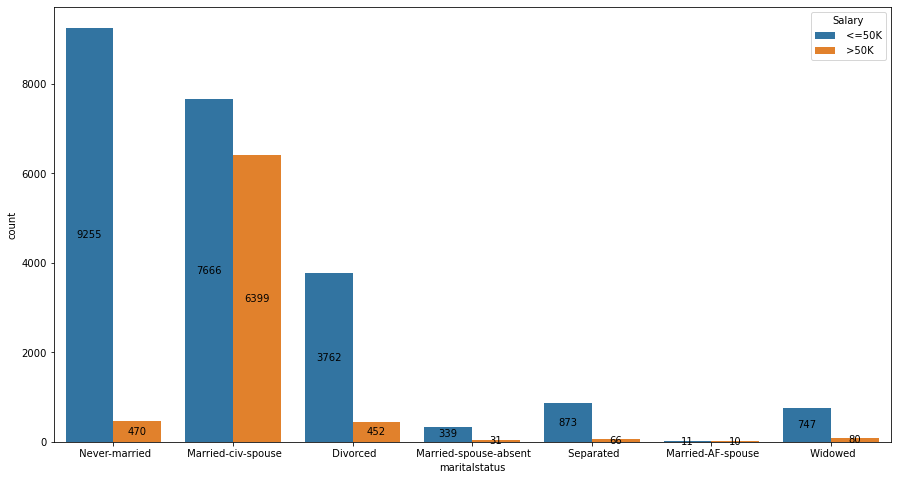

In [11]:
plt.figure(figsize=(15,8))
ct = sns.countplot(data = training_data,x='maritalstatus',hue='Salary')
for i in ct.containers:
    ct.bar_label(i,label_type='center')

### 7) occupation - Occupation of the person:- 

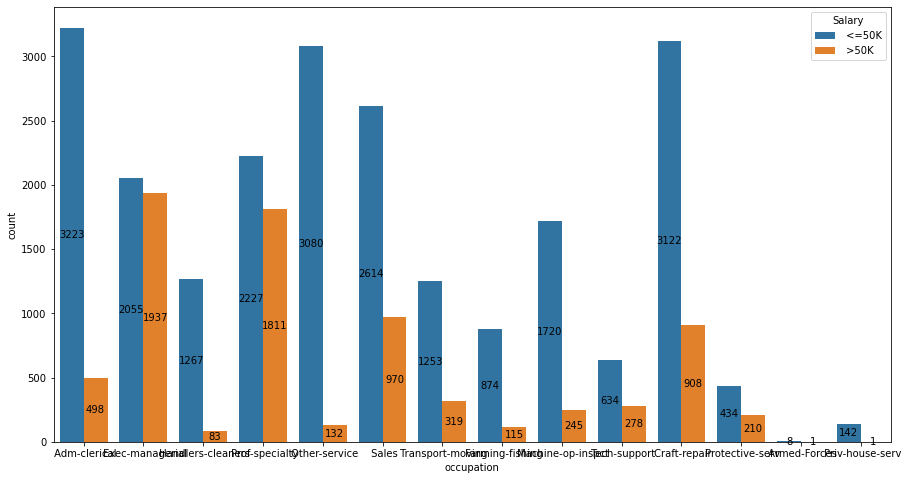

In [12]:
plt.figure(figsize=(15,8))
ct = sns.countplot(data=training_data,x='occupation',hue='Salary')
for i in ct.containers:
    ct.bar_label(i, label_type='center')

### 8) relationship - Relation type of the person:- 

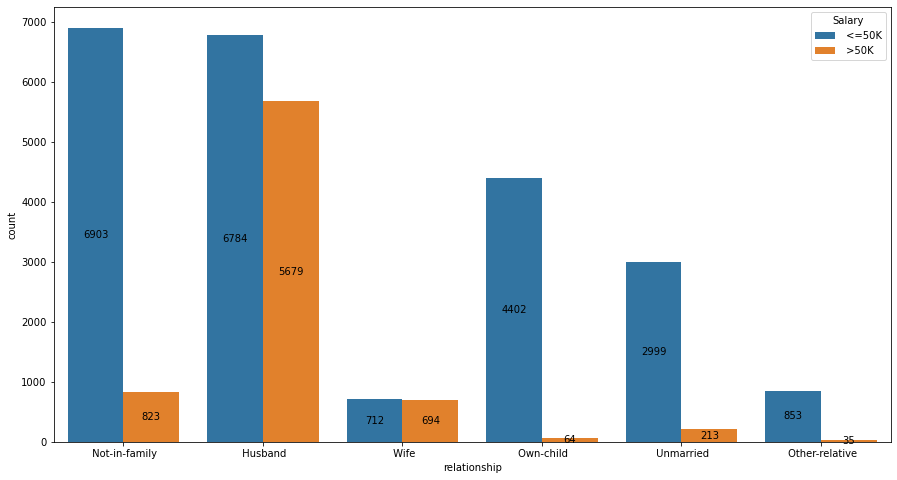

In [13]:
plt.figure(figsize=(15,8))
ct = sns.countplot(data=training_data,x='relationship',hue='Salary')
for i in ct.containers:
    ct.bar_label(i, label_type='center')

### 9) race - Race of the Person:-

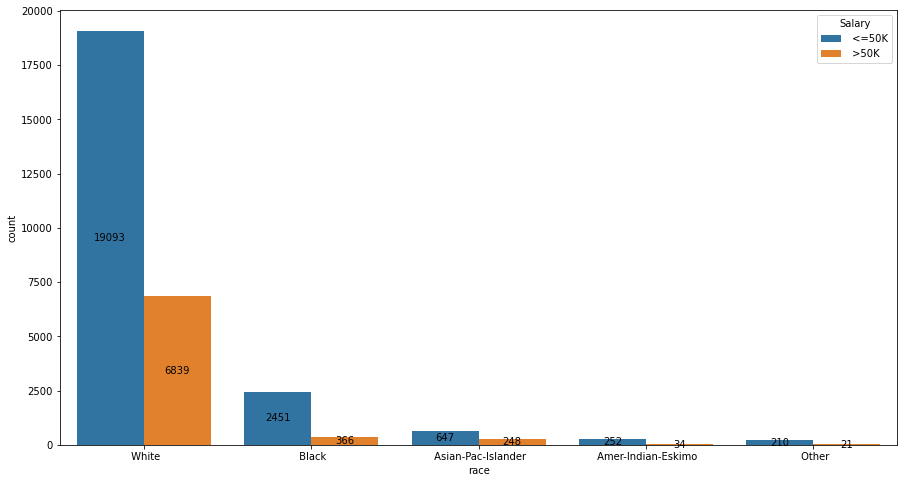

In [14]:
plt.figure(figsize=(15,8))
ct = sns.countplot(data=training_data,x='race',hue='Salary')
for i in ct.containers:
    ct.bar_label(i, label_type='center')

### 10) sex - Sex of the person:- 

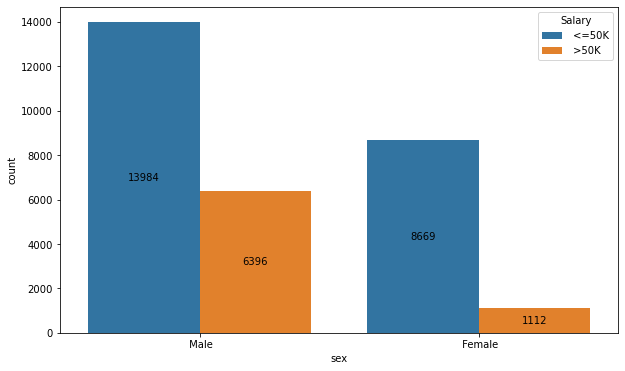

In [15]:
plt.figure(figsize=(10,6))
ct = sns.countplot(data=training_data,x='sex',hue='Salary')
for i in ct.containers:
    ct.bar_label(i, label_type='center')

### 11) native - persons native place:-

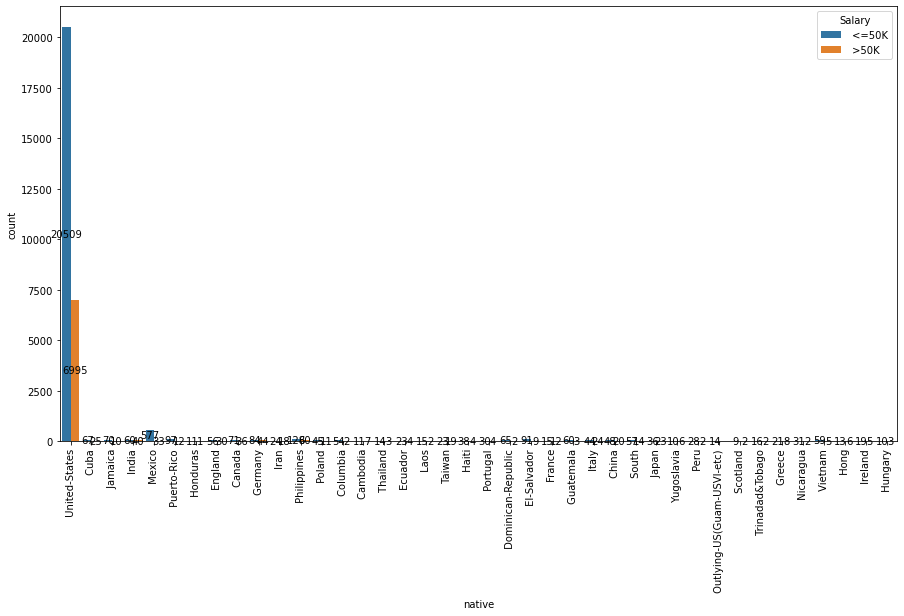

In [16]:
plt.figure(figsize=(15,8))
plt.xticks(rotation='vertical')
ct = sns.countplot(data=training_data,x='native',hue='Salary')
for i in ct.containers:
    ct.bar_label(i, label_type='center')

- As we can see here majority of the count is comming from United-States doing One-Hot ENcoding for this feature may cause in increase in computation time and memory. WE WILL DROP IT

In [17]:
# dropping native column from training data, as most of the data is from the United States:-
training_data.drop(training_data.columns[[12]],axis=1,inplace=True)
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  Salary         30161 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.0+ MB


In [18]:
# dropping native column from testing data, as most of the data is from the United States:-
testing_data.drop(testing_data.columns[[12]],axis=1,inplace=True)
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  Salary         15060 non-null  object
dtypes: int64(5), object(8)
memory usage: 1.5+ MB


- Doing One-Hot Encoding for all the categorical feature may increase the memory size as there are very big number of sub-categories, hence we will do Label Encoding to solve this problem.

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

### Label Encoding for training data:- 

In [20]:
training_data['workclass'] = label_encoder.fit_transform(training_data['workclass'])
training_data['education'] = label_encoder.fit_transform(training_data['education'])
training_data['maritalstatus'] = label_encoder.fit_transform(training_data['maritalstatus'])
training_data['occupation'] = label_encoder.fit_transform(training_data['occupation'])
training_data['relationship'] = label_encoder.fit_transform(training_data['relationship'])
training_data['race'] = label_encoder.fit_transform(training_data['race'])
training_data['sex'] = label_encoder.fit_transform(training_data['sex'])
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  int32 
 2   education      30161 non-null  int32 
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  int32 
 5   occupation     30161 non-null  int32 
 6   relationship   30161 non-null  int32 
 7   race           30161 non-null  int32 
 8   sex            30161 non-null  int32 
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  Salary         30161 non-null  object
dtypes: int32(7), int64(5), object(1)
memory usage: 2.2+ MB


### Label Encoding for the testing data:- 

In [21]:
testing_data['workclass'] = label_encoder.fit_transform(testing_data['workclass'])
testing_data['education'] = label_encoder.fit_transform(testing_data['education'])
testing_data['maritalstatus'] = label_encoder.fit_transform(testing_data['maritalstatus'])
testing_data['occupation'] = label_encoder.fit_transform(testing_data['occupation'])
testing_data['relationship'] = label_encoder.fit_transform(testing_data['relationship'])
testing_data['race'] = label_encoder.fit_transform(testing_data['race'])
testing_data['sex'] = label_encoder.fit_transform(testing_data['sex'])
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  int32 
 2   education      15060 non-null  int32 
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  int32 
 5   occupation     15060 non-null  int32 
 6   relationship   15060 non-null  int32 
 7   race           15060 non-null  int32 
 8   sex            15060 non-null  int32 
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  Salary         15060 non-null  object
dtypes: int32(7), int64(5), object(1)
memory usage: 1.1+ MB


In [22]:
# We also have to convert target variable "Salary " to binary in training data so :-

training_data['Salary'] = label_encoder.fit_transform(training_data['Salary'])
training_data.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,0
1,50,4,9,13,2,3,0,4,1,0,0,13,0
2,38,2,11,9,0,5,1,4,1,0,0,40,0
3,53,2,1,7,2,5,0,2,1,0,0,40,0
4,28,2,9,13,2,9,5,2,0,0,0,40,0


In [23]:
 # We have to convert target variable "Salary" to binary in testing data so:-
    
testing_data['Salary'] = label_encoder.fit_transform(testing_data['Salary'])
testing_data.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,0
1,38,2,11,9,2,4,0,4,1,0,0,50,0
2,28,1,7,12,2,10,0,4,1,0,0,40,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,1
4,34,2,0,6,4,7,1,4,1,0,0,30,0


In [24]:
x_train = training_data.iloc[:,:12]
x_train.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek
0,39,5,9,13,4,0,1,4,1,2174,0,40
1,50,4,9,13,2,3,0,4,1,0,0,13


In [25]:
x_test = testing_data.iloc[:,:12]
x_test.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek
0,25,2,1,7,4,6,3,2,1,0,0,40
1,38,2,11,9,2,4,0,4,1,0,0,50


In [26]:
y_train = training_data.iloc[:,-1]
y_train.head(2)

0    0
1    0
Name: Salary, dtype: int32

In [27]:
y_test = testing_data.iloc[:,-1]
y_test.head(5)

0    0
1    0
2    1
3    1
4    0
Name: Salary, dtype: int32

In [28]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((30161, 12), (30161,), (15060, 12), (15060,))

In [29]:
training_data['Salary'].value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

- It is an Imbalanced Data we have to see the Classification Report and Cross Validation Score

In [30]:
clf = SVC(kernel='rbf',gamma=0.001,C=10)
clf.fit(x_train,y_train)
y_pred_traindata = clf.predict(x_test)
acc = np.round(accuracy_score(y_test,y_pred_traindata)*100,2)
print('Accuracy for the Train Data is',acc,'%')

Accuracy for the Train Data is 85.2 %


In [34]:
result_test = cross_val_score(clf,x_test,y_test)
print(result_test.mean()*100)

84.7609561752988


In [35]:
result_train = cross_val_score(clf,x_train,y_train)
print(result_train.mean()*100)

85.24918265630983


In [33]:
print(classification_report(y_test,y_pred_traindata))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     11360
           1       0.82      0.50      0.63      3700

    accuracy                           0.85     15060
   macro avg       0.84      0.73      0.77     15060
weighted avg       0.85      0.85      0.84     15060

